In [14]:
#imports
# read multiple files 
import glob
import scipy.misc
import matplotlib.pyplot
import numpy
import scipy.special #for sigmoid function
import matplotlib.pyplot
%matplotlib inline

In [26]:
#neural network class definition
class neuralNetwork:
    
    #init the network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set number of nodes in each layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        #learning rate
        self.lr = learningrate
        #link weight matrices, weight from input to hidden layer (wih)
        # wight from hidden to output layer (who)
        #initializing the weight matrices with a normal distributed value around 0
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        #sigmoid function to scale the output of nodes
        #apply the sigmoid function to the input x and return it
        self.activation_function = lambda x:scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass
    
    #train the network
    def train(self, input_list, targets_list):
        #conver input into a 2d array (T transforms matrix)
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hl_inputs = numpy.dot(self.wih, inputs)
        #signals from hidden layer
        hl_outputs = self.activation_function(hl_inputs)
        #signals into output layer
        ol_inputs = numpy.dot(self.who, hl_outputs)
        #signals from the output layer
        ol_outputs = self.activation_function(ol_inputs)
        
        #calculate errors (target - actual value)
        output_errors = targets - ol_outputs
        #hidden layer error is the output_errors split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update weights for the links between the hidden and output layers
        self.who += self.lr*numpy.dot((output_errors*ol_outputs*(1.0-ol_outputs)), numpy.transpose(hl_outputs))
        #update weights for the links between the input and hidden layers
        self.wih += self.lr*numpy.dot((hidden_errors*hl_outputs*(1.0-hl_outputs)), numpy.transpose(inputs))
        
        pass
    
    #query the neutral network
    def querry(self, input_list):
        #convert the input in a 2d array (T transforms atrix)
        inputs = numpy.array(input_list, ndmin=2).T
        
        #signals into hidden layer
        hl_inputs = numpy.dot(self.wih, inputs)
        #signals from hidden layer
        hl_outputs = self.activation_function(hl_inputs)
        #signals into output layer
        ol_input = numpy.dot(self.who, hl_outputs)
        #signal from output layer
        ol_output = self.activation_function(ol_input)
        return ol_output
    # backquery the neural network
    #working like querry just backwards
    def backquery(self, targets_list):
        # transpose the targets
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale the values back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [27]:
#load the test data
test_data_file = open("/home/oli/Downloads/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close
#get the first test record
all_values = test_data_list[0].split(',')
#print the lable
#image_array = numpy.asfarray(all_values[1:]).reshape([28,28])
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [28]:
#init and first test of neural network
input_nodes = 784
hidden_nodes =200
output_nodes = 10
learning_rate = 0.2
#create instance of the network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
#load the training data file
training_data_file = open("/home/oli/Downloads/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
print("hi")
#train the neural network
#epochs are the number of learning processes (the number of times we iterate through the whole set)
epochs = 5
for e in range(epochs):
#go through all datasets
    i = 1
    for record in training_data_list:
        #split input by comma to get the number and data corresponding to it
        all_values = record.split(',')
        #scale and shift inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
        #create the target output values
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        print("epoch: ", e, " : ", i, " out of: 60.000")
        i = i + 1
        pass
    print(e)
    pass
print("done")

hi
epoch:  0  :  1  out of: 60.000
epoch:  0  :  2  out of: 60.000
epoch:  0  :  3  out of: 60.000
epoch:  0  :  4  out of: 60.000
epoch:  0  :  5  out of: 60.000
epoch:  0  :  6  out of: 60.000
epoch:  0  :  7  out of: 60.000
epoch:  0  :  8  out of: 60.000
epoch:  0  :  9  out of: 60.000
epoch:  0  :  10  out of: 60.000
epoch:  0  :  11  out of: 60.000
epoch:  0  :  12  out of: 60.000
epoch:  0  :  13  out of: 60.000
epoch:  0  :  14  out of: 60.000
epoch:  0  :  15  out of: 60.000
epoch:  0  :  16  out of: 60.000
epoch:  0  :  17  out of: 60.000
epoch:  0  :  18  out of: 60.000
epoch:  0  :  19  out of: 60.000
epoch:  0  :  20  out of: 60.000
epoch:  0  :  21  out of: 60.000
epoch:  0  :  22  out of: 60.000
epoch:  0  :  23  out of: 60.000
epoch:  0  :  24  out of: 60.000
epoch:  0  :  25  out of: 60.000
epoch:  0  :  26  out of: 60.000
epoch:  0  :  27  out of: 60.000
epoch:  0  :  28  out of: 60.000
epoch:  0  :  29  out of: 60.000
epoch:  0  :  30  out of: 60.000
epoch:  0  :  31

epoch:  0  :  246  out of: 60.000
epoch:  0  :  247  out of: 60.000
epoch:  0  :  248  out of: 60.000
epoch:  0  :  249  out of: 60.000
epoch:  0  :  250  out of: 60.000
epoch:  0  :  251  out of: 60.000
epoch:  0  :  252  out of: 60.000
epoch:  0  :  253  out of: 60.000
epoch:  0  :  254  out of: 60.000
epoch:  0  :  255  out of: 60.000
epoch:  0  :  256  out of: 60.000
epoch:  0  :  257  out of: 60.000
epoch:  0  :  258  out of: 60.000
epoch:  0  :  259  out of: 60.000
epoch:  0  :  260  out of: 60.000
epoch:  0  :  261  out of: 60.000
epoch:  0  :  262  out of: 60.000
epoch:  0  :  263  out of: 60.000
epoch:  0  :  264  out of: 60.000
epoch:  0  :  265  out of: 60.000
epoch:  0  :  266  out of: 60.000
epoch:  0  :  267  out of: 60.000
epoch:  0  :  268  out of: 60.000
epoch:  0  :  269  out of: 60.000
epoch:  0  :  270  out of: 60.000
epoch:  0  :  271  out of: 60.000
epoch:  0  :  272  out of: 60.000
epoch:  0  :  273  out of: 60.000
epoch:  0  :  274  out of: 60.000
epoch:  0  :  

epoch:  0  :  512  out of: 60.000
epoch:  0  :  513  out of: 60.000
epoch:  0  :  514  out of: 60.000
epoch:  0  :  515  out of: 60.000
epoch:  0  :  516  out of: 60.000
epoch:  0  :  517  out of: 60.000
epoch:  0  :  518  out of: 60.000
epoch:  0  :  519  out of: 60.000
epoch:  0  :  520  out of: 60.000
epoch:  0  :  521  out of: 60.000
epoch:  0  :  522  out of: 60.000
epoch:  0  :  523  out of: 60.000
epoch:  0  :  524  out of: 60.000
epoch:  0  :  525  out of: 60.000
epoch:  0  :  526  out of: 60.000
epoch:  0  :  527  out of: 60.000
epoch:  0  :  528  out of: 60.000
epoch:  0  :  529  out of: 60.000
epoch:  0  :  530  out of: 60.000
epoch:  0  :  531  out of: 60.000
epoch:  0  :  532  out of: 60.000
epoch:  0  :  533  out of: 60.000
epoch:  0  :  534  out of: 60.000
epoch:  0  :  535  out of: 60.000
epoch:  0  :  536  out of: 60.000
epoch:  0  :  537  out of: 60.000
epoch:  0  :  538  out of: 60.000
epoch:  0  :  539  out of: 60.000
epoch:  0  :  540  out of: 60.000
epoch:  0  :  

epoch:  0  :  763  out of: 60.000
epoch:  0  :  764  out of: 60.000
epoch:  0  :  765  out of: 60.000
epoch:  0  :  766  out of: 60.000
epoch:  0  :  767  out of: 60.000
epoch:  0  :  768  out of: 60.000
epoch:  0  :  769  out of: 60.000
epoch:  0  :  770  out of: 60.000
epoch:  0  :  771  out of: 60.000
epoch:  0  :  772  out of: 60.000
epoch:  0  :  773  out of: 60.000
epoch:  0  :  774  out of: 60.000
epoch:  0  :  775  out of: 60.000
epoch:  0  :  776  out of: 60.000
epoch:  0  :  777  out of: 60.000
epoch:  0  :  778  out of: 60.000
epoch:  0  :  779  out of: 60.000
epoch:  0  :  780  out of: 60.000
epoch:  0  :  781  out of: 60.000
epoch:  0  :  782  out of: 60.000
epoch:  0  :  783  out of: 60.000
epoch:  0  :  784  out of: 60.000
epoch:  0  :  785  out of: 60.000
epoch:  0  :  786  out of: 60.000
epoch:  0  :  787  out of: 60.000
epoch:  0  :  788  out of: 60.000
epoch:  0  :  789  out of: 60.000
epoch:  0  :  790  out of: 60.000
epoch:  0  :  791  out of: 60.000
epoch:  0  :  

epoch:  0  :  1012  out of: 60.000
epoch:  0  :  1013  out of: 60.000
epoch:  0  :  1014  out of: 60.000
epoch:  0  :  1015  out of: 60.000
epoch:  0  :  1016  out of: 60.000
epoch:  0  :  1017  out of: 60.000
epoch:  0  :  1018  out of: 60.000
epoch:  0  :  1019  out of: 60.000
epoch:  0  :  1020  out of: 60.000
epoch:  0  :  1021  out of: 60.000
epoch:  0  :  1022  out of: 60.000
epoch:  0  :  1023  out of: 60.000
epoch:  0  :  1024  out of: 60.000
epoch:  0  :  1025  out of: 60.000
epoch:  0  :  1026  out of: 60.000
epoch:  0  :  1027  out of: 60.000
epoch:  0  :  1028  out of: 60.000
epoch:  0  :  1029  out of: 60.000
epoch:  0  :  1030  out of: 60.000
epoch:  0  :  1031  out of: 60.000
epoch:  0  :  1032  out of: 60.000
epoch:  0  :  1033  out of: 60.000
epoch:  0  :  1034  out of: 60.000
epoch:  0  :  1035  out of: 60.000
epoch:  0  :  1036  out of: 60.000
epoch:  0  :  1037  out of: 60.000
epoch:  0  :  1038  out of: 60.000
epoch:  0  :  1039  out of: 60.000
epoch:  0  :  1040  

epoch:  0  :  1265  out of: 60.000
epoch:  0  :  1266  out of: 60.000
epoch:  0  :  1267  out of: 60.000
epoch:  0  :  1268  out of: 60.000
epoch:  0  :  1269  out of: 60.000
epoch:  0  :  1270  out of: 60.000
epoch:  0  :  1271  out of: 60.000
epoch:  0  :  1272  out of: 60.000
epoch:  0  :  1273  out of: 60.000
epoch:  0  :  1274  out of: 60.000
epoch:  0  :  1275  out of: 60.000
epoch:  0  :  1276  out of: 60.000
epoch:  0  :  1277  out of: 60.000
epoch:  0  :  1278  out of: 60.000
epoch:  0  :  1279  out of: 60.000
epoch:  0  :  1280  out of: 60.000
epoch:  0  :  1281  out of: 60.000
epoch:  0  :  1282  out of: 60.000
epoch:  0  :  1283  out of: 60.000
epoch:  0  :  1284  out of: 60.000
epoch:  0  :  1285  out of: 60.000
epoch:  0  :  1286  out of: 60.000
epoch:  0  :  1287  out of: 60.000
epoch:  0  :  1288  out of: 60.000
epoch:  0  :  1289  out of: 60.000
epoch:  0  :  1290  out of: 60.000
epoch:  0  :  1291  out of: 60.000
epoch:  0  :  1292  out of: 60.000
epoch:  0  :  1293  

epoch:  0  :  1512  out of: 60.000
epoch:  0  :  1513  out of: 60.000
epoch:  0  :  1514  out of: 60.000
epoch:  0  :  1515  out of: 60.000
epoch:  0  :  1516  out of: 60.000
epoch:  0  :  1517  out of: 60.000
epoch:  0  :  1518  out of: 60.000
epoch:  0  :  1519  out of: 60.000
epoch:  0  :  1520  out of: 60.000
epoch:  0  :  1521  out of: 60.000
epoch:  0  :  1522  out of: 60.000
epoch:  0  :  1523  out of: 60.000
epoch:  0  :  1524  out of: 60.000
epoch:  0  :  1525  out of: 60.000
epoch:  0  :  1526  out of: 60.000
epoch:  0  :  1527  out of: 60.000
epoch:  0  :  1528  out of: 60.000
epoch:  0  :  1529  out of: 60.000
epoch:  0  :  1530  out of: 60.000
epoch:  0  :  1531  out of: 60.000
epoch:  0  :  1532  out of: 60.000
epoch:  0  :  1533  out of: 60.000
epoch:  0  :  1534  out of: 60.000
epoch:  0  :  1535  out of: 60.000
epoch:  0  :  1536  out of: 60.000
epoch:  0  :  1537  out of: 60.000
epoch:  0  :  1538  out of: 60.000
epoch:  0  :  1539  out of: 60.000
epoch:  0  :  1540  

epoch:  0  :  1760  out of: 60.000
epoch:  0  :  1761  out of: 60.000
epoch:  0  :  1762  out of: 60.000
epoch:  0  :  1763  out of: 60.000
epoch:  0  :  1764  out of: 60.000
epoch:  0  :  1765  out of: 60.000
epoch:  0  :  1766  out of: 60.000
epoch:  0  :  1767  out of: 60.000
epoch:  0  :  1768  out of: 60.000
epoch:  0  :  1769  out of: 60.000
epoch:  0  :  1770  out of: 60.000
epoch:  0  :  1771  out of: 60.000
epoch:  0  :  1772  out of: 60.000
epoch:  0  :  1773  out of: 60.000
epoch:  0  :  1774  out of: 60.000
epoch:  0  :  1775  out of: 60.000
epoch:  0  :  1776  out of: 60.000
epoch:  0  :  1777  out of: 60.000
epoch:  0  :  1778  out of: 60.000
epoch:  0  :  1779  out of: 60.000
epoch:  0  :  1780  out of: 60.000
epoch:  0  :  1781  out of: 60.000
epoch:  0  :  1782  out of: 60.000
epoch:  0  :  1783  out of: 60.000
epoch:  0  :  1784  out of: 60.000
epoch:  0  :  1785  out of: 60.000
epoch:  0  :  1786  out of: 60.000
epoch:  0  :  1787  out of: 60.000
epoch:  0  :  1788  

epoch:  0  :  2056  out of: 60.000
epoch:  0  :  2057  out of: 60.000
epoch:  0  :  2058  out of: 60.000
epoch:  0  :  2059  out of: 60.000
epoch:  0  :  2060  out of: 60.000
epoch:  0  :  2061  out of: 60.000
epoch:  0  :  2062  out of: 60.000
epoch:  0  :  2063  out of: 60.000
epoch:  0  :  2064  out of: 60.000
epoch:  0  :  2065  out of: 60.000
epoch:  0  :  2066  out of: 60.000
epoch:  0  :  2067  out of: 60.000
epoch:  0  :  2068  out of: 60.000
epoch:  0  :  2069  out of: 60.000
epoch:  0  :  2070  out of: 60.000
epoch:  0  :  2071  out of: 60.000
epoch:  0  :  2072  out of: 60.000
epoch:  0  :  2073  out of: 60.000
epoch:  0  :  2074  out of: 60.000
epoch:  0  :  2075  out of: 60.000
epoch:  0  :  2076  out of: 60.000
epoch:  0  :  2077  out of: 60.000
epoch:  0  :  2078  out of: 60.000
epoch:  0  :  2079  out of: 60.000
epoch:  0  :  2080  out of: 60.000
epoch:  0  :  2081  out of: 60.000
epoch:  0  :  2082  out of: 60.000
epoch:  0  :  2083  out of: 60.000
epoch:  0  :  2084  

epoch:  0  :  2329  out of: 60.000
epoch:  0  :  2330  out of: 60.000
epoch:  0  :  2331  out of: 60.000
epoch:  0  :  2332  out of: 60.000
epoch:  0  :  2333  out of: 60.000
epoch:  0  :  2334  out of: 60.000
epoch:  0  :  2335  out of: 60.000
epoch:  0  :  2336  out of: 60.000
epoch:  0  :  2337  out of: 60.000
epoch:  0  :  2338  out of: 60.000
epoch:  0  :  2339  out of: 60.000
epoch:  0  :  2340  out of: 60.000
epoch:  0  :  2341  out of: 60.000
epoch:  0  :  2342  out of: 60.000
epoch:  0  :  2343  out of: 60.000
epoch:  0  :  2344  out of: 60.000
epoch:  0  :  2345  out of: 60.000
epoch:  0  :  2346  out of: 60.000
epoch:  0  :  2347  out of: 60.000
epoch:  0  :  2348  out of: 60.000
epoch:  0  :  2349  out of: 60.000
epoch:  0  :  2350  out of: 60.000
epoch:  0  :  2351  out of: 60.000
epoch:  0  :  2352  out of: 60.000
epoch:  0  :  2353  out of: 60.000
epoch:  0  :  2354  out of: 60.000
epoch:  0  :  2355  out of: 60.000
epoch:  0  :  2356  out of: 60.000
epoch:  0  :  2357  

epoch:  0  :  2606  out of: 60.000
epoch:  0  :  2607  out of: 60.000
epoch:  0  :  2608  out of: 60.000
epoch:  0  :  2609  out of: 60.000
epoch:  0  :  2610  out of: 60.000
epoch:  0  :  2611  out of: 60.000
epoch:  0  :  2612  out of: 60.000
epoch:  0  :  2613  out of: 60.000
epoch:  0  :  2614  out of: 60.000
epoch:  0  :  2615  out of: 60.000
epoch:  0  :  2616  out of: 60.000
epoch:  0  :  2617  out of: 60.000
epoch:  0  :  2618  out of: 60.000
epoch:  0  :  2619  out of: 60.000
epoch:  0  :  2620  out of: 60.000
epoch:  0  :  2621  out of: 60.000
epoch:  0  :  2622  out of: 60.000
epoch:  0  :  2623  out of: 60.000
epoch:  0  :  2624  out of: 60.000
epoch:  0  :  2625  out of: 60.000
epoch:  0  :  2626  out of: 60.000
epoch:  0  :  2627  out of: 60.000
epoch:  0  :  2628  out of: 60.000
epoch:  0  :  2629  out of: 60.000
epoch:  0  :  2630  out of: 60.000
epoch:  0  :  2631  out of: 60.000
epoch:  0  :  2632  out of: 60.000
epoch:  0  :  2633  out of: 60.000
epoch:  0  :  2634  

epoch:  0  :  2881  out of: 60.000
epoch:  0  :  2882  out of: 60.000
epoch:  0  :  2883  out of: 60.000
epoch:  0  :  2884  out of: 60.000
epoch:  0  :  2885  out of: 60.000
epoch:  0  :  2886  out of: 60.000
epoch:  0  :  2887  out of: 60.000
epoch:  0  :  2888  out of: 60.000
epoch:  0  :  2889  out of: 60.000
epoch:  0  :  2890  out of: 60.000
epoch:  0  :  2891  out of: 60.000
epoch:  0  :  2892  out of: 60.000
epoch:  0  :  2893  out of: 60.000
epoch:  0  :  2894  out of: 60.000
epoch:  0  :  2895  out of: 60.000
epoch:  0  :  2896  out of: 60.000
epoch:  0  :  2897  out of: 60.000
epoch:  0  :  2898  out of: 60.000
epoch:  0  :  2899  out of: 60.000
epoch:  0  :  2900  out of: 60.000
epoch:  0  :  2901  out of: 60.000
epoch:  0  :  2902  out of: 60.000
epoch:  0  :  2903  out of: 60.000
epoch:  0  :  2904  out of: 60.000
epoch:  0  :  2905  out of: 60.000
epoch:  0  :  2906  out of: 60.000
epoch:  0  :  2907  out of: 60.000
epoch:  0  :  2908  out of: 60.000
epoch:  0  :  2909  

epoch:  0  :  3159  out of: 60.000
epoch:  0  :  3160  out of: 60.000
epoch:  0  :  3161  out of: 60.000
epoch:  0  :  3162  out of: 60.000
epoch:  0  :  3163  out of: 60.000
epoch:  0  :  3164  out of: 60.000
epoch:  0  :  3165  out of: 60.000
epoch:  0  :  3166  out of: 60.000
epoch:  0  :  3167  out of: 60.000
epoch:  0  :  3168  out of: 60.000
epoch:  0  :  3169  out of: 60.000
epoch:  0  :  3170  out of: 60.000
epoch:  0  :  3171  out of: 60.000
epoch:  0  :  3172  out of: 60.000
epoch:  0  :  3173  out of: 60.000
epoch:  0  :  3174  out of: 60.000
epoch:  0  :  3175  out of: 60.000
epoch:  0  :  3176  out of: 60.000
epoch:  0  :  3177  out of: 60.000
epoch:  0  :  3178  out of: 60.000
epoch:  0  :  3179  out of: 60.000
epoch:  0  :  3180  out of: 60.000
epoch:  0  :  3181  out of: 60.000
epoch:  0  :  3182  out of: 60.000
epoch:  0  :  3183  out of: 60.000
epoch:  0  :  3184  out of: 60.000
epoch:  0  :  3185  out of: 60.000
epoch:  0  :  3186  out of: 60.000
epoch:  0  :  3187  

epoch:  0  :  3440  out of: 60.000
epoch:  0  :  3441  out of: 60.000
epoch:  0  :  3442  out of: 60.000
epoch:  0  :  3443  out of: 60.000
epoch:  0  :  3444  out of: 60.000
epoch:  0  :  3445  out of: 60.000
epoch:  0  :  3446  out of: 60.000
epoch:  0  :  3447  out of: 60.000
epoch:  0  :  3448  out of: 60.000
epoch:  0  :  3449  out of: 60.000
epoch:  0  :  3450  out of: 60.000
epoch:  0  :  3451  out of: 60.000
epoch:  0  :  3452  out of: 60.000
epoch:  0  :  3453  out of: 60.000
epoch:  0  :  3454  out of: 60.000
epoch:  0  :  3455  out of: 60.000
epoch:  0  :  3456  out of: 60.000
epoch:  0  :  3457  out of: 60.000
epoch:  0  :  3458  out of: 60.000
epoch:  0  :  3459  out of: 60.000
epoch:  0  :  3460  out of: 60.000
epoch:  0  :  3461  out of: 60.000
epoch:  0  :  3462  out of: 60.000
epoch:  0  :  3463  out of: 60.000
epoch:  0  :  3464  out of: 60.000
epoch:  0  :  3465  out of: 60.000
epoch:  0  :  3466  out of: 60.000
epoch:  0  :  3467  out of: 60.000
epoch:  0  :  3468  

epoch:  0  :  3724  out of: 60.000
epoch:  0  :  3725  out of: 60.000
epoch:  0  :  3726  out of: 60.000
epoch:  0  :  3727  out of: 60.000
epoch:  0  :  3728  out of: 60.000
epoch:  0  :  3729  out of: 60.000
epoch:  0  :  3730  out of: 60.000
epoch:  0  :  3731  out of: 60.000
epoch:  0  :  3732  out of: 60.000
epoch:  0  :  3733  out of: 60.000
epoch:  0  :  3734  out of: 60.000
epoch:  0  :  3735  out of: 60.000
epoch:  0  :  3736  out of: 60.000
epoch:  0  :  3737  out of: 60.000
epoch:  0  :  3738  out of: 60.000
epoch:  0  :  3739  out of: 60.000
epoch:  0  :  3740  out of: 60.000
epoch:  0  :  3741  out of: 60.000
epoch:  0  :  3742  out of: 60.000
epoch:  0  :  3743  out of: 60.000
epoch:  0  :  3744  out of: 60.000
epoch:  0  :  3745  out of: 60.000
epoch:  0  :  3746  out of: 60.000
epoch:  0  :  3747  out of: 60.000
epoch:  0  :  3748  out of: 60.000
epoch:  0  :  3749  out of: 60.000
epoch:  0  :  3750  out of: 60.000
epoch:  0  :  3751  out of: 60.000
epoch:  0  :  3752  

epoch:  0  :  3992  out of: 60.000
epoch:  0  :  3993  out of: 60.000
epoch:  0  :  3994  out of: 60.000
epoch:  0  :  3995  out of: 60.000
epoch:  0  :  3996  out of: 60.000
epoch:  0  :  3997  out of: 60.000
epoch:  0  :  3998  out of: 60.000
epoch:  0  :  3999  out of: 60.000
epoch:  0  :  4000  out of: 60.000
epoch:  0  :  4001  out of: 60.000
epoch:  0  :  4002  out of: 60.000
epoch:  0  :  4003  out of: 60.000
epoch:  0  :  4004  out of: 60.000
epoch:  0  :  4005  out of: 60.000
epoch:  0  :  4006  out of: 60.000
epoch:  0  :  4007  out of: 60.000
epoch:  0  :  4008  out of: 60.000
epoch:  0  :  4009  out of: 60.000
epoch:  0  :  4010  out of: 60.000
epoch:  0  :  4011  out of: 60.000
epoch:  0  :  4012  out of: 60.000
epoch:  0  :  4013  out of: 60.000
epoch:  0  :  4014  out of: 60.000
epoch:  0  :  4015  out of: 60.000
epoch:  0  :  4016  out of: 60.000
epoch:  0  :  4017  out of: 60.000
epoch:  0  :  4018  out of: 60.000
epoch:  0  :  4019  out of: 60.000
epoch:  0  :  4020  

epoch:  0  :  4278  out of: 60.000
epoch:  0  :  4279  out of: 60.000
epoch:  0  :  4280  out of: 60.000
epoch:  0  :  4281  out of: 60.000
epoch:  0  :  4282  out of: 60.000
epoch:  0  :  4283  out of: 60.000
epoch:  0  :  4284  out of: 60.000
epoch:  0  :  4285  out of: 60.000
epoch:  0  :  4286  out of: 60.000
epoch:  0  :  4287  out of: 60.000
epoch:  0  :  4288  out of: 60.000
epoch:  0  :  4289  out of: 60.000
epoch:  0  :  4290  out of: 60.000
epoch:  0  :  4291  out of: 60.000
epoch:  0  :  4292  out of: 60.000
epoch:  0  :  4293  out of: 60.000
epoch:  0  :  4294  out of: 60.000
epoch:  0  :  4295  out of: 60.000
epoch:  0  :  4296  out of: 60.000
epoch:  0  :  4297  out of: 60.000
epoch:  0  :  4298  out of: 60.000
epoch:  0  :  4299  out of: 60.000
epoch:  0  :  4300  out of: 60.000
epoch:  0  :  4301  out of: 60.000
epoch:  0  :  4302  out of: 60.000
epoch:  0  :  4303  out of: 60.000
epoch:  0  :  4304  out of: 60.000
epoch:  0  :  4305  out of: 60.000
epoch:  0  :  4306  

epoch:  0  :  4559  out of: 60.000
epoch:  0  :  4560  out of: 60.000
epoch:  0  :  4561  out of: 60.000
epoch:  0  :  4562  out of: 60.000
epoch:  0  :  4563  out of: 60.000
epoch:  0  :  4564  out of: 60.000
epoch:  0  :  4565  out of: 60.000
epoch:  0  :  4566  out of: 60.000
epoch:  0  :  4567  out of: 60.000
epoch:  0  :  4568  out of: 60.000
epoch:  0  :  4569  out of: 60.000
epoch:  0  :  4570  out of: 60.000
epoch:  0  :  4571  out of: 60.000
epoch:  0  :  4572  out of: 60.000
epoch:  0  :  4573  out of: 60.000
epoch:  0  :  4574  out of: 60.000
epoch:  0  :  4575  out of: 60.000
epoch:  0  :  4576  out of: 60.000
epoch:  0  :  4577  out of: 60.000
epoch:  0  :  4578  out of: 60.000
epoch:  0  :  4579  out of: 60.000
epoch:  0  :  4580  out of: 60.000
epoch:  0  :  4581  out of: 60.000
epoch:  0  :  4582  out of: 60.000
epoch:  0  :  4583  out of: 60.000
epoch:  0  :  4584  out of: 60.000
epoch:  0  :  4585  out of: 60.000
epoch:  0  :  4586  out of: 60.000
epoch:  0  :  4587  

epoch:  0  :  4870  out of: 60.000
epoch:  0  :  4871  out of: 60.000
epoch:  0  :  4872  out of: 60.000
epoch:  0  :  4873  out of: 60.000
epoch:  0  :  4874  out of: 60.000
epoch:  0  :  4875  out of: 60.000
epoch:  0  :  4876  out of: 60.000
epoch:  0  :  4877  out of: 60.000
epoch:  0  :  4878  out of: 60.000
epoch:  0  :  4879  out of: 60.000
epoch:  0  :  4880  out of: 60.000
epoch:  0  :  4881  out of: 60.000
epoch:  0  :  4882  out of: 60.000
epoch:  0  :  4883  out of: 60.000
epoch:  0  :  4884  out of: 60.000
epoch:  0  :  4885  out of: 60.000
epoch:  0  :  4886  out of: 60.000
epoch:  0  :  4887  out of: 60.000
epoch:  0  :  4888  out of: 60.000
epoch:  0  :  4889  out of: 60.000
epoch:  0  :  4890  out of: 60.000
epoch:  0  :  4891  out of: 60.000
epoch:  0  :  4892  out of: 60.000
epoch:  0  :  4893  out of: 60.000
epoch:  0  :  4894  out of: 60.000
epoch:  0  :  4895  out of: 60.000
epoch:  0  :  4896  out of: 60.000
epoch:  0  :  4897  out of: 60.000
epoch:  0  :  4898  

epoch:  0  :  5111  out of: 60.000
epoch:  0  :  5112  out of: 60.000
epoch:  0  :  5113  out of: 60.000
epoch:  0  :  5114  out of: 60.000
epoch:  0  :  5115  out of: 60.000
epoch:  0  :  5116  out of: 60.000
epoch:  0  :  5117  out of: 60.000
epoch:  0  :  5118  out of: 60.000
epoch:  0  :  5119  out of: 60.000
epoch:  0  :  5120  out of: 60.000
epoch:  0  :  5121  out of: 60.000
epoch:  0  :  5122  out of: 60.000
epoch:  0  :  5123  out of: 60.000
epoch:  0  :  5124  out of: 60.000
epoch:  0  :  5125  out of: 60.000
epoch:  0  :  5126  out of: 60.000
epoch:  0  :  5127  out of: 60.000
epoch:  0  :  5128  out of: 60.000
epoch:  0  :  5129  out of: 60.000
epoch:  0  :  5130  out of: 60.000
epoch:  0  :  5131  out of: 60.000
epoch:  0  :  5132  out of: 60.000
epoch:  0  :  5133  out of: 60.000
epoch:  0  :  5134  out of: 60.000
epoch:  0  :  5135  out of: 60.000
epoch:  0  :  5136  out of: 60.000
epoch:  0  :  5137  out of: 60.000
epoch:  0  :  5138  out of: 60.000
epoch:  0  :  5139  

epoch:  0  :  5380  out of: 60.000
epoch:  0  :  5381  out of: 60.000
epoch:  0  :  5382  out of: 60.000
epoch:  0  :  5383  out of: 60.000
epoch:  0  :  5384  out of: 60.000
epoch:  0  :  5385  out of: 60.000
epoch:  0  :  5386  out of: 60.000
epoch:  0  :  5387  out of: 60.000
epoch:  0  :  5388  out of: 60.000
epoch:  0  :  5389  out of: 60.000
epoch:  0  :  5390  out of: 60.000
epoch:  0  :  5391  out of: 60.000
epoch:  0  :  5392  out of: 60.000
epoch:  0  :  5393  out of: 60.000
epoch:  0  :  5394  out of: 60.000
epoch:  0  :  5395  out of: 60.000
epoch:  0  :  5396  out of: 60.000
epoch:  0  :  5397  out of: 60.000
epoch:  0  :  5398  out of: 60.000
epoch:  0  :  5399  out of: 60.000
epoch:  0  :  5400  out of: 60.000
epoch:  0  :  5401  out of: 60.000
epoch:  0  :  5402  out of: 60.000
epoch:  0  :  5403  out of: 60.000
epoch:  0  :  5404  out of: 60.000
epoch:  0  :  5405  out of: 60.000
epoch:  0  :  5406  out of: 60.000
epoch:  0  :  5407  out of: 60.000
epoch:  0  :  5408  

epoch:  0  :  5651  out of: 60.000
epoch:  0  :  5652  out of: 60.000
epoch:  0  :  5653  out of: 60.000
epoch:  0  :  5654  out of: 60.000
epoch:  0  :  5655  out of: 60.000
epoch:  0  :  5656  out of: 60.000
epoch:  0  :  5657  out of: 60.000
epoch:  0  :  5658  out of: 60.000
epoch:  0  :  5659  out of: 60.000
epoch:  0  :  5660  out of: 60.000
epoch:  0  :  5661  out of: 60.000
epoch:  0  :  5662  out of: 60.000
epoch:  0  :  5663  out of: 60.000
epoch:  0  :  5664  out of: 60.000
epoch:  0  :  5665  out of: 60.000
epoch:  0  :  5666  out of: 60.000
epoch:  0  :  5667  out of: 60.000
epoch:  0  :  5668  out of: 60.000
epoch:  0  :  5669  out of: 60.000
epoch:  0  :  5670  out of: 60.000
epoch:  0  :  5671  out of: 60.000
epoch:  0  :  5672  out of: 60.000
epoch:  0  :  5673  out of: 60.000
epoch:  0  :  5674  out of: 60.000
epoch:  0  :  5675  out of: 60.000
epoch:  0  :  5676  out of: 60.000
epoch:  0  :  5677  out of: 60.000
epoch:  0  :  5678  out of: 60.000
epoch:  0  :  5679  

epoch:  0  :  5921  out of: 60.000
epoch:  0  :  5922  out of: 60.000
epoch:  0  :  5923  out of: 60.000
epoch:  0  :  5924  out of: 60.000
epoch:  0  :  5925  out of: 60.000
epoch:  0  :  5926  out of: 60.000
epoch:  0  :  5927  out of: 60.000
epoch:  0  :  5928  out of: 60.000
epoch:  0  :  5929  out of: 60.000
epoch:  0  :  5930  out of: 60.000
epoch:  0  :  5931  out of: 60.000
epoch:  0  :  5932  out of: 60.000
epoch:  0  :  5933  out of: 60.000
epoch:  0  :  5934  out of: 60.000
epoch:  0  :  5935  out of: 60.000
epoch:  0  :  5936  out of: 60.000
epoch:  0  :  5937  out of: 60.000
epoch:  0  :  5938  out of: 60.000
epoch:  0  :  5939  out of: 60.000
epoch:  0  :  5940  out of: 60.000
epoch:  0  :  5941  out of: 60.000
epoch:  0  :  5942  out of: 60.000
epoch:  0  :  5943  out of: 60.000
epoch:  0  :  5944  out of: 60.000
epoch:  0  :  5945  out of: 60.000
epoch:  0  :  5946  out of: 60.000
epoch:  0  :  5947  out of: 60.000
epoch:  0  :  5948  out of: 60.000
epoch:  0  :  5949  

epoch:  0  :  6204  out of: 60.000
epoch:  0  :  6205  out of: 60.000
epoch:  0  :  6206  out of: 60.000
epoch:  0  :  6207  out of: 60.000
epoch:  0  :  6208  out of: 60.000
epoch:  0  :  6209  out of: 60.000
epoch:  0  :  6210  out of: 60.000
epoch:  0  :  6211  out of: 60.000
epoch:  0  :  6212  out of: 60.000
epoch:  0  :  6213  out of: 60.000
epoch:  0  :  6214  out of: 60.000
epoch:  0  :  6215  out of: 60.000
epoch:  0  :  6216  out of: 60.000
epoch:  0  :  6217  out of: 60.000
epoch:  0  :  6218  out of: 60.000
epoch:  0  :  6219  out of: 60.000
epoch:  0  :  6220  out of: 60.000
epoch:  0  :  6221  out of: 60.000
epoch:  0  :  6222  out of: 60.000
epoch:  0  :  6223  out of: 60.000
epoch:  0  :  6224  out of: 60.000
epoch:  0  :  6225  out of: 60.000
epoch:  0  :  6226  out of: 60.000
epoch:  0  :  6227  out of: 60.000
epoch:  0  :  6228  out of: 60.000
epoch:  0  :  6229  out of: 60.000
epoch:  0  :  6230  out of: 60.000
epoch:  0  :  6231  out of: 60.000
epoch:  0  :  6232  

epoch:  0  :  6486  out of: 60.000
epoch:  0  :  6487  out of: 60.000
epoch:  0  :  6488  out of: 60.000
epoch:  0  :  6489  out of: 60.000
epoch:  0  :  6490  out of: 60.000
epoch:  0  :  6491  out of: 60.000
epoch:  0  :  6492  out of: 60.000
epoch:  0  :  6493  out of: 60.000
epoch:  0  :  6494  out of: 60.000
epoch:  0  :  6495  out of: 60.000
epoch:  0  :  6496  out of: 60.000
epoch:  0  :  6497  out of: 60.000
epoch:  0  :  6498  out of: 60.000
epoch:  0  :  6499  out of: 60.000
epoch:  0  :  6500  out of: 60.000
epoch:  0  :  6501  out of: 60.000
epoch:  0  :  6502  out of: 60.000
epoch:  0  :  6503  out of: 60.000
epoch:  0  :  6504  out of: 60.000
epoch:  0  :  6505  out of: 60.000
epoch:  0  :  6506  out of: 60.000
epoch:  0  :  6507  out of: 60.000
epoch:  0  :  6508  out of: 60.000
epoch:  0  :  6509  out of: 60.000
epoch:  0  :  6510  out of: 60.000
epoch:  0  :  6511  out of: 60.000
epoch:  0  :  6512  out of: 60.000
epoch:  0  :  6513  out of: 60.000
epoch:  0  :  6514  

epoch:  0  :  6755  out of: 60.000
epoch:  0  :  6756  out of: 60.000
epoch:  0  :  6757  out of: 60.000
epoch:  0  :  6758  out of: 60.000
epoch:  0  :  6759  out of: 60.000
epoch:  0  :  6760  out of: 60.000
epoch:  0  :  6761  out of: 60.000
epoch:  0  :  6762  out of: 60.000
epoch:  0  :  6763  out of: 60.000
epoch:  0  :  6764  out of: 60.000
epoch:  0  :  6765  out of: 60.000
epoch:  0  :  6766  out of: 60.000
epoch:  0  :  6767  out of: 60.000
epoch:  0  :  6768  out of: 60.000
epoch:  0  :  6769  out of: 60.000
epoch:  0  :  6770  out of: 60.000
epoch:  0  :  6771  out of: 60.000
epoch:  0  :  6772  out of: 60.000
epoch:  0  :  6773  out of: 60.000
epoch:  0  :  6774  out of: 60.000
epoch:  0  :  6775  out of: 60.000
epoch:  0  :  6776  out of: 60.000
epoch:  0  :  6777  out of: 60.000
epoch:  0  :  6778  out of: 60.000
epoch:  0  :  6779  out of: 60.000
epoch:  0  :  6780  out of: 60.000
epoch:  0  :  6781  out of: 60.000
epoch:  0  :  6782  out of: 60.000
epoch:  0  :  6783  

epoch:  0  :  6996  out of: 60.000
epoch:  0  :  6997  out of: 60.000
epoch:  0  :  6998  out of: 60.000
epoch:  0  :  6999  out of: 60.000
epoch:  0  :  7000  out of: 60.000
epoch:  0  :  7001  out of: 60.000
epoch:  0  :  7002  out of: 60.000
epoch:  0  :  7003  out of: 60.000
epoch:  0  :  7004  out of: 60.000
epoch:  0  :  7005  out of: 60.000
epoch:  0  :  7006  out of: 60.000
epoch:  0  :  7007  out of: 60.000
epoch:  0  :  7008  out of: 60.000
epoch:  0  :  7009  out of: 60.000
epoch:  0  :  7010  out of: 60.000
epoch:  0  :  7011  out of: 60.000
epoch:  0  :  7012  out of: 60.000
epoch:  0  :  7013  out of: 60.000
epoch:  0  :  7014  out of: 60.000
epoch:  0  :  7015  out of: 60.000
epoch:  0  :  7016  out of: 60.000
epoch:  0  :  7017  out of: 60.000
epoch:  0  :  7018  out of: 60.000
epoch:  0  :  7019  out of: 60.000
epoch:  0  :  7020  out of: 60.000
epoch:  0  :  7021  out of: 60.000
epoch:  0  :  7022  out of: 60.000
epoch:  0  :  7023  out of: 60.000
epoch:  0  :  7024  

epoch:  0  :  7255  out of: 60.000
epoch:  0  :  7256  out of: 60.000
epoch:  0  :  7257  out of: 60.000
epoch:  0  :  7258  out of: 60.000
epoch:  0  :  7259  out of: 60.000
epoch:  0  :  7260  out of: 60.000
epoch:  0  :  7261  out of: 60.000
epoch:  0  :  7262  out of: 60.000
epoch:  0  :  7263  out of: 60.000
epoch:  0  :  7264  out of: 60.000
epoch:  0  :  7265  out of: 60.000
epoch:  0  :  7266  out of: 60.000
epoch:  0  :  7267  out of: 60.000
epoch:  0  :  7268  out of: 60.000
epoch:  0  :  7269  out of: 60.000
epoch:  0  :  7270  out of: 60.000
epoch:  0  :  7271  out of: 60.000
epoch:  0  :  7272  out of: 60.000
epoch:  0  :  7273  out of: 60.000
epoch:  0  :  7274  out of: 60.000
epoch:  0  :  7275  out of: 60.000
epoch:  0  :  7276  out of: 60.000
epoch:  0  :  7277  out of: 60.000
epoch:  0  :  7278  out of: 60.000
epoch:  0  :  7279  out of: 60.000
epoch:  0  :  7280  out of: 60.000
epoch:  0  :  7281  out of: 60.000
epoch:  0  :  7282  out of: 60.000
epoch:  0  :  7283  

epoch:  0  :  7541  out of: 60.000
epoch:  0  :  7542  out of: 60.000
epoch:  0  :  7543  out of: 60.000
epoch:  0  :  7544  out of: 60.000
epoch:  0  :  7545  out of: 60.000
epoch:  0  :  7546  out of: 60.000
epoch:  0  :  7547  out of: 60.000
epoch:  0  :  7548  out of: 60.000
epoch:  0  :  7549  out of: 60.000
epoch:  0  :  7550  out of: 60.000
epoch:  0  :  7551  out of: 60.000
epoch:  0  :  7552  out of: 60.000
epoch:  0  :  7553  out of: 60.000
epoch:  0  :  7554  out of: 60.000
epoch:  0  :  7555  out of: 60.000
epoch:  0  :  7556  out of: 60.000
epoch:  0  :  7557  out of: 60.000
epoch:  0  :  7558  out of: 60.000
epoch:  0  :  7559  out of: 60.000
epoch:  0  :  7560  out of: 60.000
epoch:  0  :  7561  out of: 60.000
epoch:  0  :  7562  out of: 60.000
epoch:  0  :  7563  out of: 60.000
epoch:  0  :  7564  out of: 60.000
epoch:  0  :  7565  out of: 60.000
epoch:  0  :  7566  out of: 60.000
epoch:  0  :  7567  out of: 60.000
epoch:  0  :  7568  out of: 60.000
epoch:  0  :  7569  

KeyboardInterrupt: 

In [17]:
#test the neural network and see how it scores
#save the scores, initially empty
scorecard = []
#go through all the records in the test dataset
for record in test_data_list:
    #split by ,
    all_values = record.split(',')
    #correct answer is first value
    correct_label = int(all_values[0])
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query 
    outputs = n.querry(inputs)
    #the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print("solution: ", correct_label, "guess: ", label)
    #append correct or incorrect to list
    if(label == correct_label):
        #if the answer was correct add 1 to scorecarde
        scorecard.append(1)
        print("CORRECT: solution: ", correct_label, "guess: ", label)
    else:
        #if the answer is wrong add 0
        scorecard.append(0)
        print("WRONG: solution: ", correct_label, "guess: ", label)
    pass
pass
#calculate performance score
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT:

CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  8 guess:  8
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  0 guess:  0
CORRECT: solution:  2 guess:  2
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  2 guess:  2
CORRECT: solution:  7 guess:  7
CORRECT: solution:  4 guess:  4
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: solution:  0 guess:  0
CORRECT: solution:  0 guess:  0
CORRECT: solution:  3 guess:  3
CORRECT:

CORRECT: solution:  0 guess:  0
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  7 guess:  7
CORRECT: solution:  7 guess:  7
CORRECT: solution:  0 guess:  0
CORRECT: solution:  8 guess:  8
CORRECT: solution:  7 guess:  7
CORRECT: solution:  4 guess:  4
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  9 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
WRONG: solution:  4 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: s

CORRECT: solution:  5 guess:  5
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  1 guess:  1
CORRECT: solution:  4 guess:  4
CORRECT: solution:  4 guess:  4
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT:

CORRECT: solution:  4 guess:  4
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  8 guess:  8
CORRECT: solution:  2 guess:  2
WRONG: solution:  4 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  5 guess:  5
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
CORRECT: solution:  8 guess:  8
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  5 guess:  5
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: s

CORRECT: solution:  5 guess:  5
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  0 guess:  0
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT:

CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
WRONG: solution:  7 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
WRONG: solution:  7 guess:  9
CORRECT: sol

CORRECT: solution:  3 guess:  3
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
WRONG: solution:  5 guess:  3
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
WRONG: solution:  7 guess:  9
CORRECT: solution:  4 guess:  4
CORRECT: solution:  2 guess:  2
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
WRONG: solution:  9 guess:  0
WRONG: solution:  8 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
WRONG: solution:  9 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  2 guess:  2
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
WRONG: solution:  8 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  

CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  8 guess:  8
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  2 guess:  2
WRONG: solution:  7 guess:  4
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
WRONG: solution:  5 guess:  8
CORRECT: solution:  8 guess:  8
CORRECT: solution:  3 guess:  3
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  2 guess:  2
CORRECT: sol

CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
WRONG: solution:  9 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  8 guess:  8
WRONG: solution:  1 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  3 guess:  3
CORRECT: solution:  7 guess:  7
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: solution:  7 guess:  7
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: sol

CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  7 guess:  7
CORRECT: solution:  7 guess:  7
WRONG: solution:  2 guess:  8
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
WRONG: solution:  7 guess:  9
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
WRONG: solution:  2 guess:  7
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  0 guess:  0
CORRECT: solution:  0 guess:  0
CORRECT: solution:  8 guess:  8
CORRECT: solution:  7 guess:  7
CORRECT: solution:  6 guess:  6
CORRECT: solution:  1 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solut

CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  8 guess:  8
CORRECT: solution:  2 guess:  2
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
WRONG: solution:  2 guess:  8
CORRECT: solution:  2 guess:  2
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  4 guess:  4
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  1 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  7 guess:  7
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  0 guess:  0
CORRECT: s

CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  7 guess:  7
CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  8 guess:  8
CORRECT: solution:  5 guess:  5
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  0 guess:  0
CORRECT:

CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  2 guess:  2
CORRECT: solution:  0 guess:  0
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  0 guess:  0
CORRECT: solution:  3 guess:  3
CORRECT: solution:  0 guess:  0
CORRECT: solution:  2 guess:  2
CORRECT: solution:  5 guess:  5
WRONG: solution:  5 guess:  8
CORRECT: solution:  7 guess:  7
CORRECT: solution:  9 guess:  9
WRONG: solution:  5 guess:  7
CORRECT: solution:  5 guess:  5
CORRECT: solution:  0 guess:  0
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: sol

CORRECT: solution:  0 guess:  0
CORRECT: solution:  8 guess:  8
CORRECT: solution:  3 guess:  3
CORRECT: solution:  0 guess:  0
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  5 guess:  5
CORRECT: solution:  3 guess:  3
WRONG: solution:  8 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  7 guess:  7
CORRECT: s

CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  4 guess:  4
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  6 guess:  6
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT:

CORRECT: solution:  7 guess:  7
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  2 guess:  2
CORRECT: solution:  6 guess:  6
CORRECT: solution:  2 guess:  2
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT:

CORRECT: solution:  0 guess:  0
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  2 guess:  2
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  4 guess:  4
CORRECT: solution:  2 guess:  2
CORRECT: solution:  7 guess:  7
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  4 guess:  4
CORRECT: solution:  8 guess:  8
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: solution:  0 guess:  0
CORRECT:

CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  8 guess:  8
WRONG: solution:  7 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  7 guess:  7
CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: s

CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  8 guess:  8
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  7 guess:  7
CORRECT: solution:  5 guess:  5
CORRECT: solution:  8 guess:  8
CORRECT: solution:  2 guess:  2
CORRECT:

CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  4 guess:  4
CORRECT: solution:  2 guess:  2
WRONG: solution:  8 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: s

CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT:

CORRECT: solution:  6 guess:  6
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: solution:  8 guess:  8
CORRECT: solution:  6 guess:  6
CORRECT: solution:  5 guess:  5
CORRECT: solution:  4 guess:  4
CORRECT: solution:  0 guess:  0
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  3 guess:  3
CORRECT: solution:  7 guess:  7
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
WRONG: solution:  4 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  1 guess:  1
CORRECT: s

CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  8 guess:  8
CORRECT: solution:  1 guess:  1
CORRECT: solution:  4 guess:  4
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  1 guess:  1
CORRECT: solution:  8 guess:  8
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  3 guess:  3
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT: solution:  5 guess:  5
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  6 guess:  6
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT:

CORRECT: solution:  5 guess:  5
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  8 guess:  8
CORRECT: solution:  6 guess:  6
CORRECT: solution:  3 guess:  3
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  9 guess:  9
CORRECT: solution:  6 guess:  6
CORRECT:

CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT: solution:  4 guess:  4
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT:

CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: solution:  5 guess:  5
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  9 guess:  9
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  2 guess:  2
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT:

CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  1 guess:  1
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  4 guess:  4
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
CORRECT: solution:  0 guess:  0
CORRECT: solution:  4 guess:  4
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  6 guess:  6
CORRECT: solution:  6 guess:  6
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  7 guess:  7
CORRECT: solution:  6 guess:  6
CORRECT: solution:  1 guess:  1
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
WRONG: solution:  7 guess:  2
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: s

CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
WRONG: solution:  8 guess:  5
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: solution:  5 guess:  5
CORRECT: solution:  5 guess:  5
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  7 guess:  7
CORRECT: s

CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  6 guess:  6
CORRECT: solution:  0 guess:  0
WRONG: solution:  0 guess:  8
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  7 guess:  7
CORRECT: solution:  9 guess:  9
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  9 guess:  9
CORRECT: solution:  1 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: s

WRONG: solution:  6 guess:  0
CORRECT: solution:  3 guess:  3
CORRECT: solution:  9 guess:  9
CORRECT: solution:  9 guess:  9
CORRECT: solution:  8 guess:  8
CORRECT: solution:  2 guess:  2
CORRECT: solution:  7 guess:  7
CORRECT: solution:  7 guess:  7
CORRECT: solution:  1 guess:  1
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
WRONG: solution:  3 guess:  9
CORRECT: solution:  4 guess:  4
CORRECT: solution:  5 guess:  5
CORRECT: solution:  6 guess:  6
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  0 guess:  0
CORRECT: solution:  1 guess:  1
CORRECT: solution:  2 guess:  2
CORRECT: solution:  3 guess:  3
CORRECT: solution:  4 guess:  4
CORRECT: solution:  7 guess:  7
CORRECT: solution:  8 guess:  8
CORRECT: solution:  9 guess:  9
CORRECT: sol

In [18]:
# load own handwriting
our_own_dataset = []

# load the png image data
for image_file_name in glob.glob('/home/oli/Make-your-own-neural-network/own_handwriting/?.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = scipy.misc.imread(image_file_name, flatten=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)

    
    pass


loading ...  /home/oli/Make-your-own-neural-network/own_handwriting/5.png
0.01
0.930118
loading ...  /home/oli/Make-your-own-neural-network/own_handwriting/9.png
0.01
0.798118
loading ...  /home/oli/Make-your-own-neural-network/own_handwriting/8.png
0.01
0.887412


In [ ]:
# test the neural network with our own images
# record to test
item = 0

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.querry(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

hi
[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.99]
done


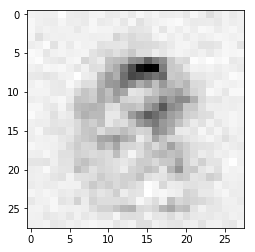

In [32]:
#run the backquery and see its output

# test input into the output layer
label = 9
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')
print("done")